# Test PDPbox with binary classification problem
## Kaggle Titanic with Logistic Regression
This demo is based on **Titanic: Machine Learning from Disaster**  
https://www.kaggle.com/c/titanic/details/tutorials

In [1]:
import pandas as pd
import numpy as np
import os

%matplotlib inline

### read dataset

In [2]:
titanic = pd.read_csv('titanic_train.csv')

### simple feature engineering

#### impute null values

In [3]:
titanic["Age"] = titanic["Age"].fillna(titanic["Age"].dropna().median())
titanic["Embarked"] = titanic["Embarked"].fillna("S")

#### handle categrical features

In [4]:
titanic['Sex'] = titanic['Sex'].apply(lambda x : 1 if x == 'male' else 0)
titanic = pd.get_dummies(titanic, columns=['Embarked'])

#### features to used

In [5]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S']

## Test logistic regression with PDPbox

In [7]:
from sklearn.linear_model import LogisticRegression
from pdpbox import pdp

In [8]:
lr = LogisticRegression(C=1.0, random_state=123, n_jobs=4)
%time lr.fit(titanic[features], titanic['Survived'])

Wall time: 26 ms


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=4,
          penalty='l2', random_state=123, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## binary feature: Sex

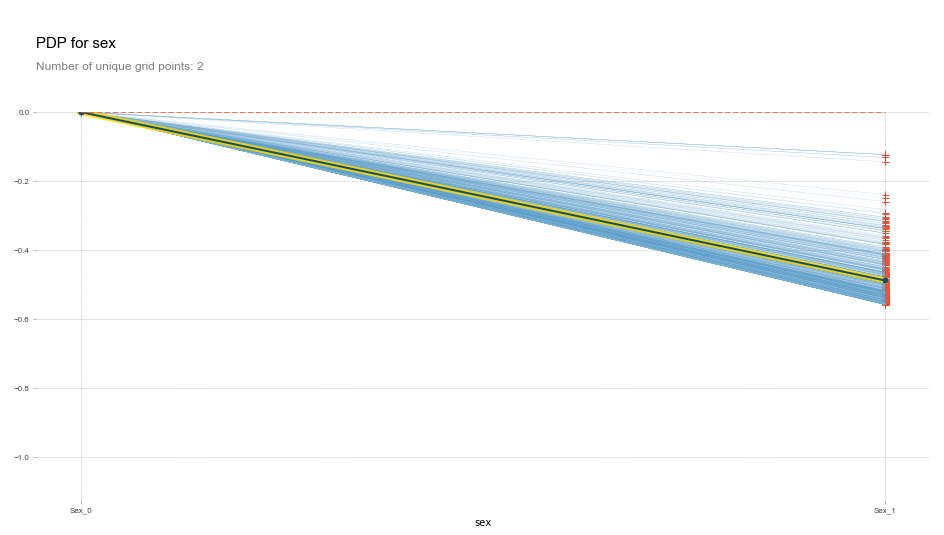

In [9]:
pdp_sex_lr = pdp.pdp_isolate(lr, titanic[features], 'Sex')
pdp.pdp_plot(pdp_sex_lr, 'sex', plot_org_pts=True, plot_lines=True, frac_to_plot=1)

## numeric feature: Fare

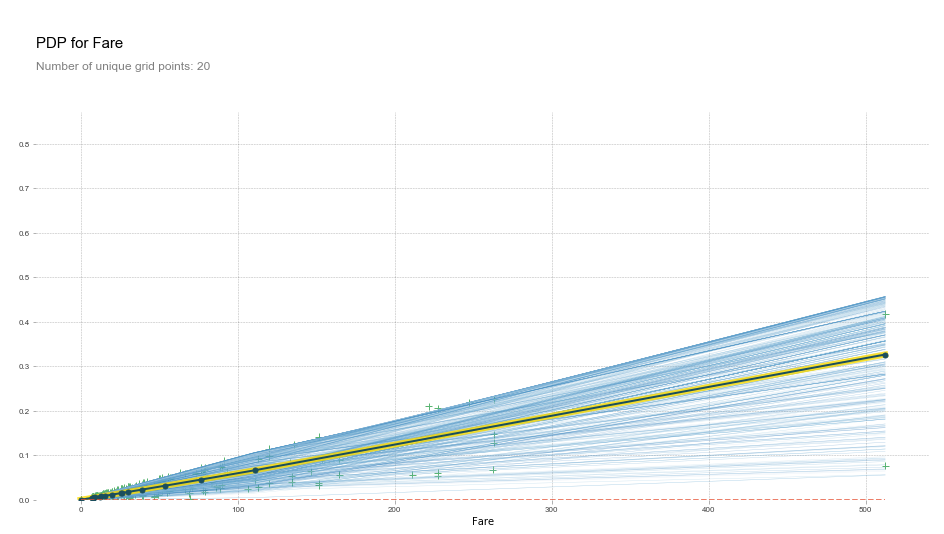

In [10]:
pdp_fare_lr = pdp.pdp_isolate(lr, titanic[features], 'Fare', num_grid_points=20)
pdp.pdp_plot(pdp_fare_lr, 'Fare', plot_org_pts=True, frac_to_plot=0.5, plot_lines=True)

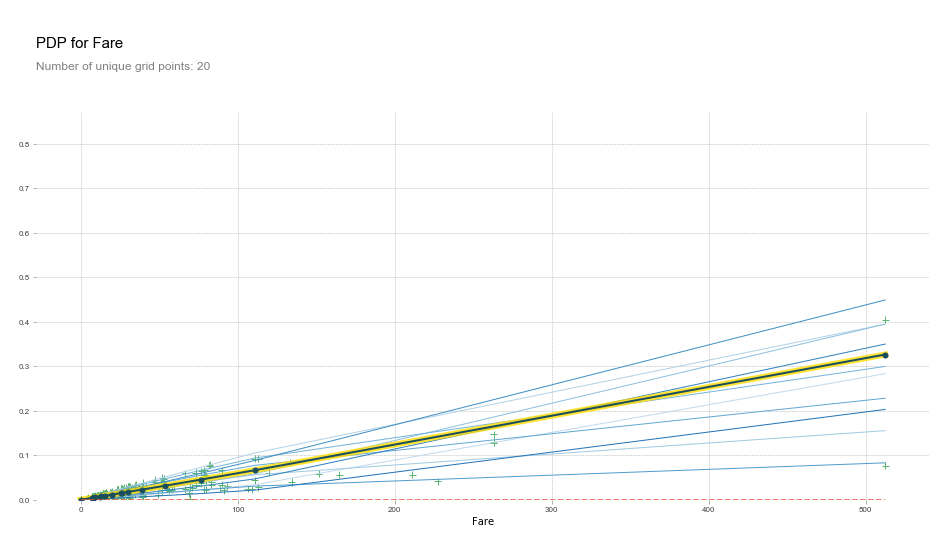

In [11]:
pdp.pdp_plot(pdp_fare_lr, 'Fare', plot_org_pts=True, frac_to_plot=0.5, plot_lines=True, cluster=True, n_cluster_centers=10)

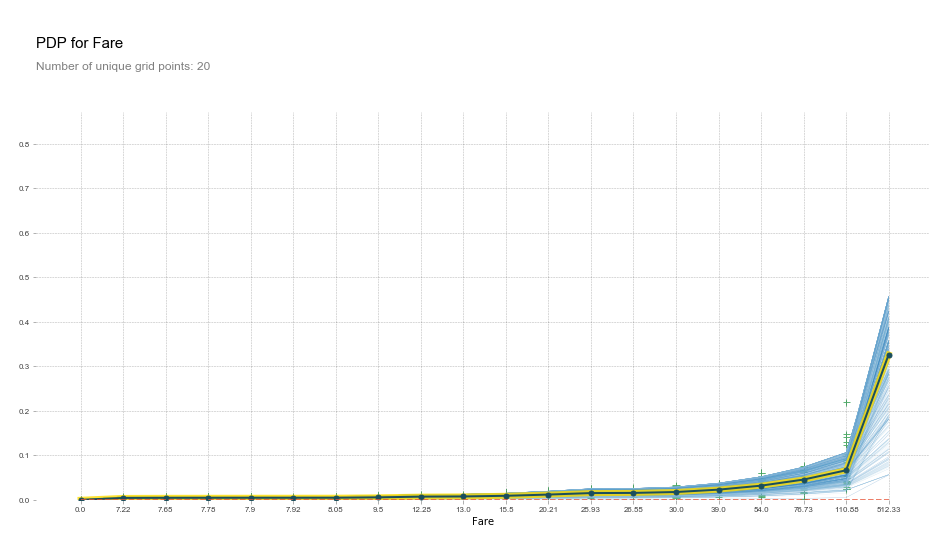

In [12]:
pdp.pdp_plot(pdp_fare_lr, 'Fare', plot_org_pts=True, frac_to_plot=0.5, plot_lines=True, x_quantile=True)

## one-hot encoding feature: Embarked

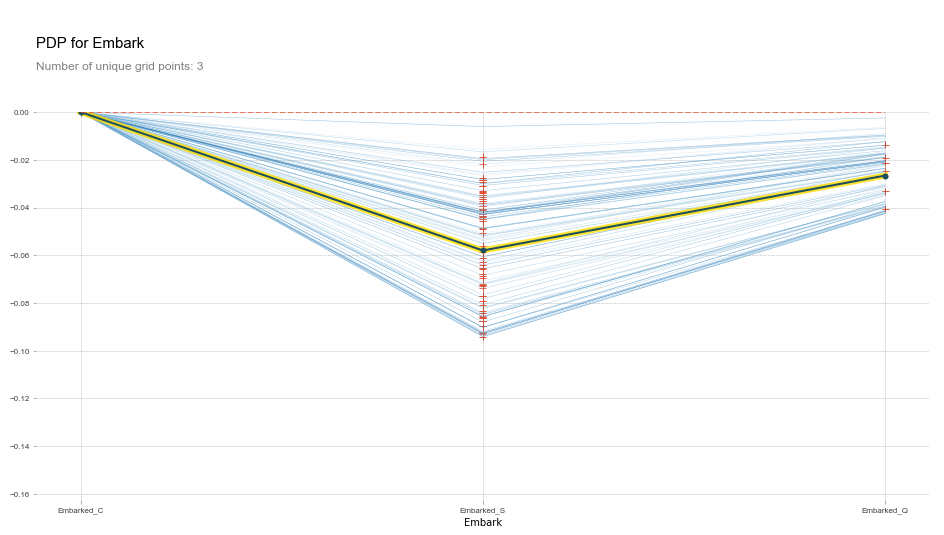

In [13]:
pdp_embark_lr = pdp.pdp_isolate(lr, titanic[features], ['Embarked_C', 'Embarked_S', 'Embarked_Q'])
pdp.pdp_plot(pdp_embark_lr, 'Embark', plot_org_pts=True, plot_lines=True, frac_to_plot=100)

### test interaction between age and fare

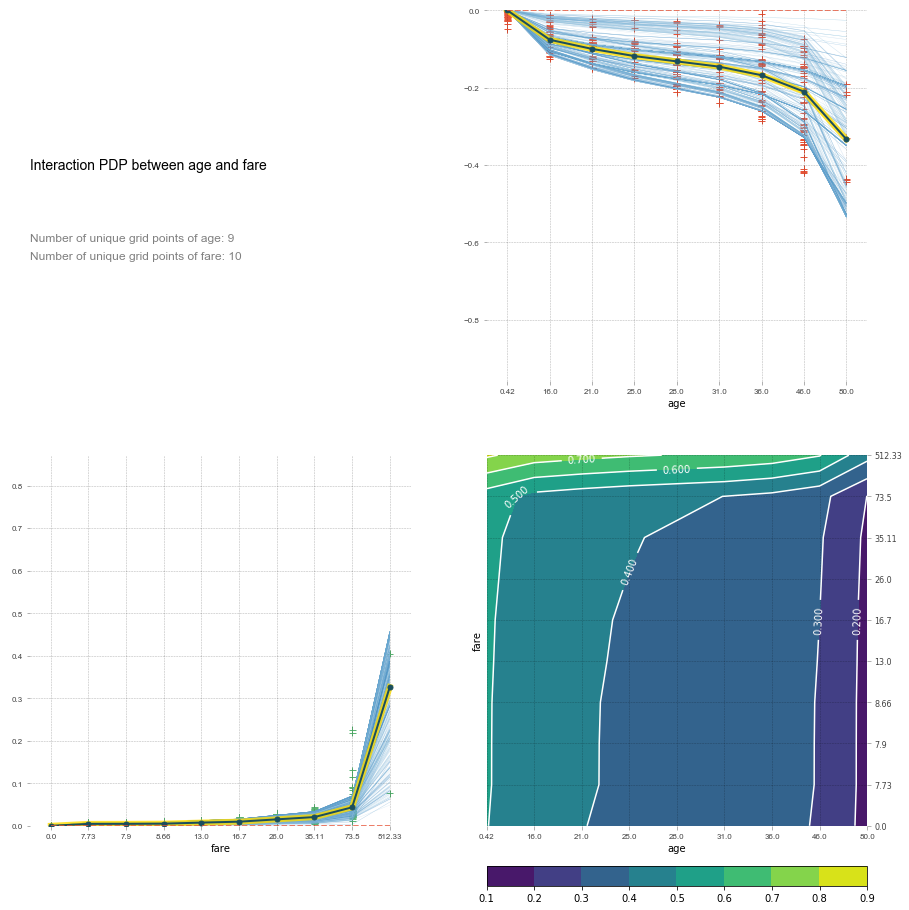

In [14]:
inter_lr = pdp.pdp_interact(lr, titanic[features], ['Age', 'Fare'], num_grid_points=[10, 10], percentile_ranges=[None, None])
pdp.pdp_interact_plot(inter_lr, ['age', 'fare'], center=True, plot_org_pts=True, plot_lines=True, frac_to_plot=0.5, x_quantile=True)